# 상관분석

* 두 변수의 선형관계를 확인
* 두 수치형 비교는 Pearson, (순서형은 Spearman/Kendall)
* 절대값이 0에 가까우면 상관 없음, 1에 가까우면 선형관계



In [90]:
import pandas as pd

# 임시 데이터 생성
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_df = pd.DataFrame(X)

In [91]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr, kendalltau

# feature 0번과 2번의 corr이 -0.96으로 강한 상관관계가 있음을 확인
X_df.corr().round(2)

,0,1,2,3,4,5,6,7,8,9
0,1.00,-0.62,-0.96,-0.31,0.08,0.10,-0.00,-0.08,-0.05,0.10
1,-0.62,1.00,0.36,0.94,-0.06,-0.20,-0.01,0.10,0.02,0.04
2,-0.96,0.36,1.00,0.02,-0.07,-0.04,0.01,0.06,0.06,-0.14
3,-0.31,0.94,0.02,1.00,-0.04,-0.20,-0.02,0.08,0.00,0.09
4,0.08,-0.06,-0.07,-0.04,1.00,-0.06,0.00,0.07,0.14,-0.10
5,0.10,-0.20,-0.04,-0.20,-0.06,1.00,0.08,-0.07,0.07,0.18
6,-0.00,-0.01,0.01,-0.02,0.00,0.08,1.00,0.00,-0.07,0.02
7,-0.08,0.10,0.06,0.08,0.07,-0.07,0.00,1.00,-0.06,-0.06
8,-0.05,0.02,0.06,0.00,0.14,0.07,-0.07,-0.06,1.00,0.08
9,0.10,0.04,-0.14,0.09,-0.10,0.18,0.02,-0.06,0.08,1.00


In [92]:
stat, p = pearsonr(X_df[0], X_df[2])
print("statistic={0:.2f}, pvalue={1:.2f}".format(stat, p))

statistic=-0.96, pvalue=0.00


In [93]:
%reset -f

# 비계층적 군집분석(K-Means Clustering)

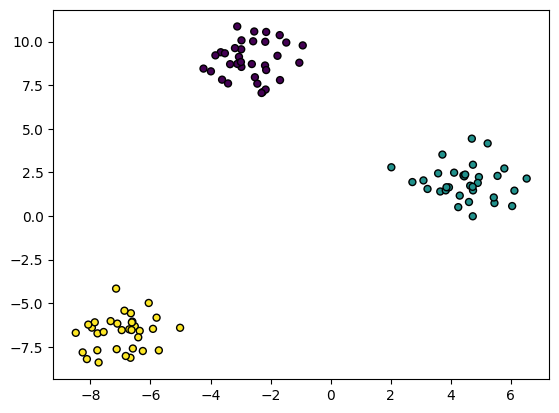

In [94]:
# 임시 데이터 생성
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_features=2, centers=3, random_state=42)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [95]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1
0,-7.726421,-8.394957
1,5.453396,0.742305
2,-2.978672,9.556846
3,6.042673,0.571319
4,-6.521840,-6.319325


In [96]:
from sklearn.preprocessing import MinMaxScaler

X_mm = MinMaxScaler().fit_transform(X_df)
X_df_mm = pd.DataFrame(X_mm)  # MinMaxScaler의 output이 numpy.ndarray로 반환되어 DataFrame으로 변환
X_df_mm.head()

,0,1
0,0.050668,0.000000
1,0.928552,0.474379
2,0.366907,0.932003
3,0.967802,0.465502
4,0.130903,0.107761


In [97]:
from sklearn.preprocessing import StandardScaler

X_ss = StandardScaler().fit_transform(X_df)
X_df_ss = pd.DataFrame(X_ss)  # StandardScaler의 output이 numpy.ndarray로 반환되어 DataFrame으로 변환
X_df_ss.head()

,0,1
0,-1.257301,-1.524866
1,1.499872,-0.113177
2,-0.264088,1.248653
3,1.623146,-0.139594
4,-1.005307,-1.204185


In [98]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init=10, random_state=42)
model.fit(X_df)
model

KMeans(n_clusters=3, n_init=10, random_state=42)

In [99]:
model.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [100]:
model.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

In [101]:
df = X_df.copy()
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,0,1
cluster,,
0,4.499510,1.938920
1,-6.951710,-6.676217
2,-2.667804,8.935761


In [102]:
%reset -f

# 단순 회귀분석

* 독립변수(X)가 하나


In [103]:
# 임시 데이터 생성
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


X, y = make_regression(n_samples=100, n_features=4, noise=10, bias=3, random_state=42)
df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd'])
df['target']= y

df_train, df_test = train_test_split(df, test_size = 0.3, random_state=42)

df.head()

,a,b,c,d,target
0,0.852433,-0.661786,0.186454,-2.025143,-5.575472
1,-0.493001,-0.208122,-0.622700,0.280992,-29.723471
2,-1.142970,0.058209,0.153725,-0.883857,-118.416799
3,0.375698,-1.150994,0.110923,-0.544383,10.652266
4,-1.196207,-1.106335,-0.185659,-0.479174,-130.472065


In [104]:
# ols
from statsmodels.formula.api import ols

f = 'target ~ a + b + c + d'
model = ols(formula=f, data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           4.97e-63
Time:                        13:12:21   Log-Likelihood:                -266.36
No. Observations:                  70   AIC:                             542.7
Df Residuals:                      65   BIC:                             554.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3628      1.400      2.402      0.019       0.566       6.159
a             86.6410      1.346     64.375      0.000      83.953      89.329
b              5.0475      1.448      3.486      0.001       2.156       7.939
c             27.5158      1.503     18.311      0.000      24.515      30.517
d             38.1281      1.584     24.063      0.000      34.964      41.293
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.242
Skew:                           0.140   Prob(JB):                        0.886
Kurtosis:                       2.929   Cond. No.                         1.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
from sklearn.metrics import mean_squared_error

pred = model.predict(df_test)
rmse = mean_squared_error(df_test['target'], pred) ** 0.5
print('{0:.2f}'.format(rmse))

10.24


In [106]:
# statsmodels OLS
from statsmodels.api import OLS, add_constant

X_df = df.iloc[:, :-1]
y_df = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

add_constant(X_train)

model = OLS(y_train, X_train).fit() # 종속변수와 독립변수의 순서가 sklearn과 반대인 것을 주의
print(model.params)

a    86.623902
b     5.751787
c    28.252129
d    38.363578
dtype: float64


In [107]:
add_constant(X_test)
pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred) ** 0.5
print('{0:.2f}'.format(rmse))

10.41


In [108]:
# Scikit-Learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred) ** 0.5
print('{0:.2f}'.format(rmse))

10.24


In [109]:
%reset -f

# 다중 회귀분석
* 다중공선성 문제는 분산팽창계수(VIF-Variance Inflation Factor)를 확인하여 해결한다


In [110]:
# 임시 데이터 생성
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


X, y = make_regression(n_samples=100, n_features=4, noise=10, bias=3, random_state=42)
df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd'])
# 'd'에 다중공선성을 가진 'e'열 추가
noise_level = 0.2
df['e'] = df['d'] + np.random.normal(0, noise_level, size=len(df))
df['target'] = y

In [111]:
df.iloc[:, :-1].corr().round(2)

,a,b,c,d,e
a,1.00,-0.04,0.14,-0.02,0.00
b,-0.04,1.00,-0.03,0.02,0.01
c,0.14,-0.03,1.00,-0.02,-0.01
d,-0.02,0.02,-0.02,1.00,0.98
e,0.00,0.01,-0.01,0.98,1.00


In [112]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

f = 'target ~ ' + ' + '.join(df.columns[:-1])
y, X = dmatrices(f, data=df, return_type='dataframe')
X.head()

,Intercept,a,b,c,d,e
0,1.0,0.852433,-0.661786,0.186454,-2.025143,-2.250780
1,1.0,-0.493001,-0.208122,-0.622700,0.280992,0.277709
2,1.0,-1.142970,0.058209,0.153725,-0.883857,-1.200057
3,1.0,0.375698,-1.150994,0.110923,-0.544383,-0.498627
4,1.0,-1.196207,-1.106335,-0.185659,-0.479174,-0.363924


In [113]:
df_vif = pd.DataFrame()
df_vif['col_name'] = X.columns
df_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

,col_name,VIF
0,Intercept,1.029186
1,a,1.029909
2,b,1.004450
3,c,1.021100
4,d,21.707929
5,e,21.691226


In [114]:
# 다중공선성 제거를 위해서 'e' column 제거
df2 = df.drop('e', axis=1)

f = 'target ~ ' + ' + '.join(df2.iloc[:, :-1].columns)
y, X = dmatrices(f, data=df2, return_type='dataframe')

df2_vif = pd.DataFrame()
df2_vif['col_name'] = X.columns
df2_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df2_vif

,col_name,VIF
0,Intercept,1.003589
1,a,1.020560
2,b,1.002556
3,c,1.020111
4,d,1.000866


In [115]:
%reset -f

# 로지스틱 회귀분석

In [116]:
# Iris 데이터 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

ds = load_iris()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df['target'] = ds.target
print(ds.target_names)

df['target'].value_counts()
df['is_setosa'] = (df['target']==0) + 0

df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [117]:
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [118]:
# statsmodels로 문제 해결
from statsmodels.api import Logit


model = Logit(endog=df_train['is_setosa'], exog=df_train.iloc[:, :2]).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.045193
         Iterations 11


sepal length (cm)    -7.039608
sepal width (cm)     12.343640
dtype: float64

In [119]:
from sklearn.metrics import accuracy_score

pred_proba = model.predict(df_test.iloc[:, :2])
pred = (pred_proba > 0.5) + 0

acc = accuracy_score(df_test['is_setosa'], pred)
print(acc)

1.0


In [120]:
# sklearn으로 문제 해결
from sklearn.linear_model import LogisticRegression

X_df = df.iloc[:, :2]
y_df = df['is_setosa']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
#pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
threshold = 0.5
pred = (pred_proba[:, 1] > threshold) + 0
acc = accuracy_score(y_test, pred)
print(acc)

1.0


In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba[:, 1])

1.0

In [122]:
%reset -f

# 나이브 베이즈

In [123]:
# iris 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris

ds = load_iris()
X_df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
y_df_tmp = pd.DataFrame(data=ds.target)
y_df = pd.DataFrame()
y_df['is_setosa'] = (y_df_tmp==0) + 0

In [124]:
# Test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)
print(X_train.shape[0], X_test.shape[0])

105 45


In [125]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)
pred_prob = model.predict_proba(X_test)
pred = (pred_prob[:, 1] > 0.5) + 0
pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

In [126]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
print(acc)

1.0


In [127]:
%reset -f

# KNN(K-Nearest Neighbor)

In [128]:
# iris 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris

ds = load_iris()
X_df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
y_df_tmp = ds.target
y_df = (y_df_tmp==0) + 0

# Test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)
print(X_train.shape[0], X_test.shape[0])

105 45


In [129]:
# Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc)

1.0


In [130]:
# Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# rmse = mse ** 0.5


model = KNeighborsRegressor(n_neighbors=3)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)

In [131]:
%reset -f

# 의사결정나무

In [132]:
# 분류나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# acc = accuracy_score(y_test, pred)

In [133]:
# 회귀나무
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# RMSE = MSE ** 0.5


model = DecisionTreeRegressor(random_state=42)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mse = mean_squared_error(y_test, pred)